In [1]:
!pip install boto3 pillow matplotlib --quiet

In [3]:
import boto3
s3 = boto3.client('s3')
bucket_name = 'smile-detection-lab-zehra'  #Change this
object_key = 'webcam_20250629_220413.jpg'       	# use the correct key
# Download the image into your notebook
s3.download_file(bucket_name, object_key, 'webcam_20250629_220413.jpg')
print("Image downloaded from S3")

Image downloaded from S3


Matplotlib is building the font cache; this may take a moment.


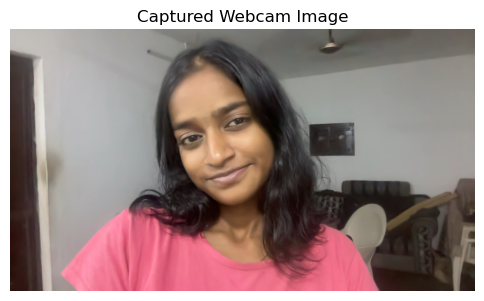

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(object_key)  # Dynamically uses variable
plt.figure(figsize=(6, 4))    # Optional: sets image display size
plt.imshow(img)
plt.axis('off')  # Hide axis lines
plt.title("Captured Webcam Image")
plt.show()

In [5]:
import boto3
# Initialize Rekognition client
rekognition = boto3.client('rekognition')
# Read image bytes
with open(object_key, 'rb') as image_file:
    image_bytes = image_file.read()
# Detect faces and emotions
response = rekognition.detect_faces(
    Image={'Bytes': image_bytes},
    Attributes=['ALL']
)
# Loop and print smile + emotions
for i, faceDetail in enumerate(response['FaceDetails'], start=1):
    smile = faceDetail['Smile']
    print(f"Face {i}:")
    print(f"  Smile: {smile['Value']} (Confidence: {smile['Confidence']:.2f}%)")
    print("  Emotions:")
    for emotion in faceDetail['Emotions']:
        print(f"    {emotion['Type']}: {emotion['Confidence']:.2f}%")
    print("-" * 30)

Face 1:
  Smile: True (Confidence: 98.22%)
  Emotions:
    HAPPY: 98.70%
    CALM: 0.32%
    SURPRISED: 0.02%
    SAD: 0.02%
    DISGUSTED: 0.01%
    CONFUSED: 0.00%
    FEAR: 0.00%
    ANGRY: 0.00%
------------------------------


Face 1 Smile info: Smiling (98.2%)


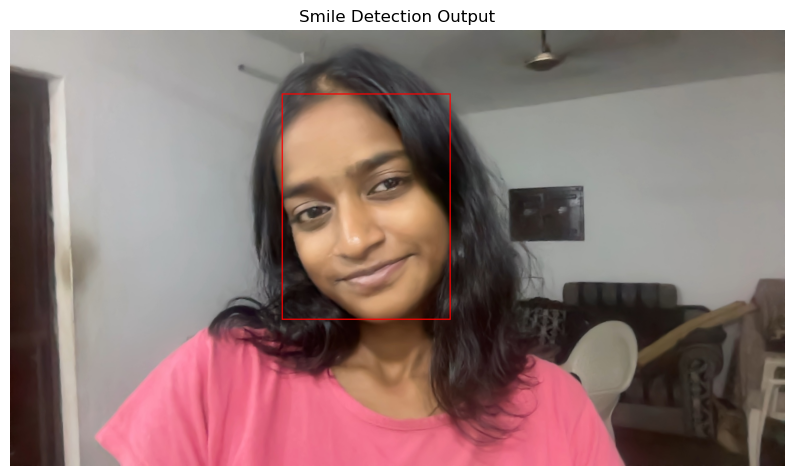

In [6]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import boto3
# Load image
object_key = 'webcam_20250629_220413.jpg'  # Change this to your image file
image = Image.open(object_key)
img_width, img_height = image.size
# Rekognition client
rekognition = boto3.client('rekognition')
# Detect faces
with open(object_key, 'rb') as img_file:
    response = rekognition.detect_faces(
        Image={'Bytes': img_file.read()},
        Attributes=['ALL']
    )
# Draw bounding boxes
draw = ImageDraw.Draw(image)
for i, face in enumerate(response['FaceDetails']):
    # Print smile info
    smile = face['Smile']
    print(f"Face {i+1} Smile info: {'Smiling' if smile['Value'] else 'Not Smiling'} ({smile['Confidence']:.1f}%)")
    # Draw bounding box
    box = face['BoundingBox']
    left = img_width * box['Left']
    top = img_height * box['Top']
    width = img_width * box['Width']
    height = img_height * box['Height']
    draw.rectangle([left, top, left + width, top + height], outline='red', width=3)
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Smile Detection Output")
plt.show()